In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate


In [17]:
#1 Load the IMDb dataset into a pandas DataFrame:-
data=pd.read_csv("C:\\Users\\Dell\\Downloads\\IMDB-Movie-Data.csv")
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [18]:
#2. first 5 rows of the dataset:- 
data.head(5)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [19]:
#3. Overview of column data types and missing values:-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [20]:
#4 Columns with missing values:-
data.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [21]:
#5. Essential columns for analyzing movie ratings and details:-
data.drop(['Rank','Description'],axis=1)

,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...
995,Secret in Their Eyes,"Crime,Drama,Mystery",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,Hostel: Part II,Horror,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,Step Up 2: The Streets,"Drama,Music,Romance",Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,Search Party,"Adventure,Comedy",Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [22]:
#6. Average runtime of movies:- 
data['Runtime (Minutes)'].mean()

113.172

In [23]:
#7. Number of movies in each genre:-
all_act = data['Genre'].str.cat(sep=',')
act_list = all_act.split(',')





In [24]:
## freuency of every actor:-
act_counts = pd.Series(act_list).value_counts()

In [25]:
#top 3 actors
top_act = act_counts.head()

In [26]:
print(top_act)

Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
dtype: int64


In [27]:
#8. Top 5 directors with the most movies in the dataset:-
dic_count=data['Director'].value_counts() 
print(dic_count.head(5))

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
Name: Director, dtype: int64


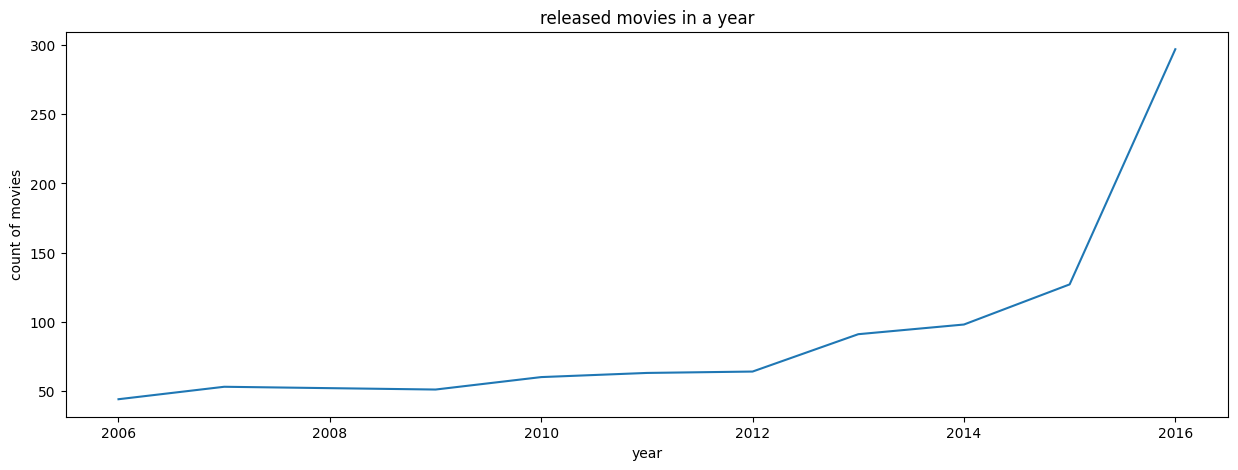

In [28]:
#9. Line plot showing the number of movies released each year:-
plt.figure(figsize=(15, 5))
fig=data['Year'].value_counts().sort_index()
plt.title('released movies in a year')
plt.xlabel('year')
plt.ylabel('count of movies')
plt.plot(fig.index,fig.values)

(array([  3.,  78., 256., 268., 208.,  98.,  52.,  26.,   6.,   5.]),
 array([ 66. ,  78.5,  91. , 103.5, 116. , 128.5, 141. , 153.5, 166. ,
        178.5, 191. ]),
 <BarContainer object of 10 artists>)

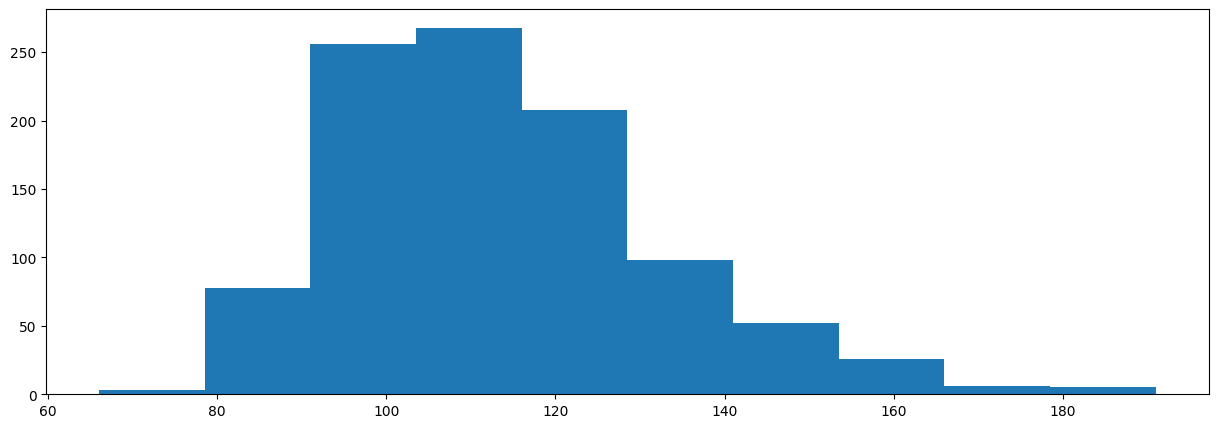

In [29]:
#10. Histogram depicting the distribution of movie runtime:-
plt.figure(figsize=(15, 5))
plt.hist(data['Runtime (Minutes)'])

(array([  1.,   3.,   8.,  20.,  55., 154., 283., 281., 172.,  23.]),
 array([1.9 , 2.61, 3.32, 4.03, 4.74, 5.45, 6.16, 6.87, 7.58, 8.29, 9.  ]),
 <BarContainer object of 10 artists>)

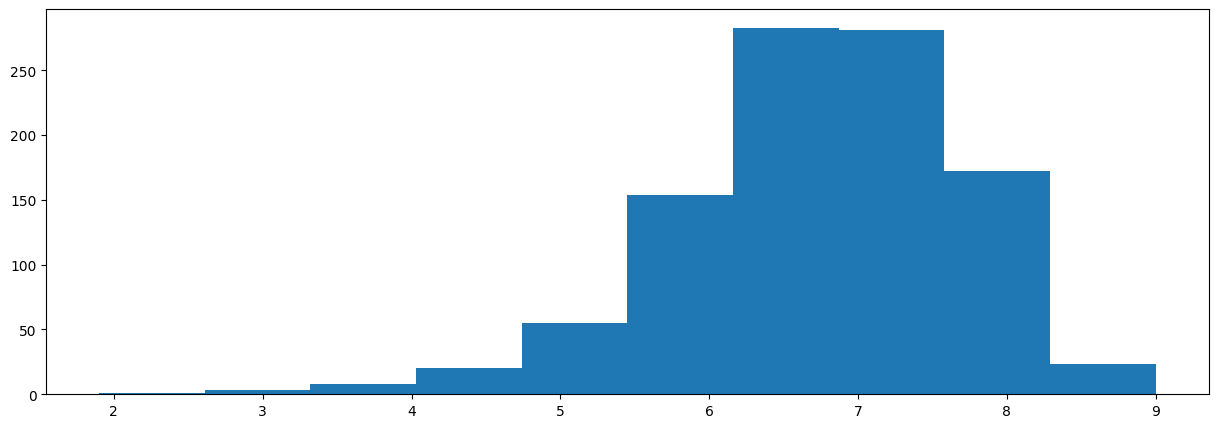

In [30]:
#11. Histogram showcasing the distribution of movie ratings:-
plt.figure(figsize=(15, 5))
plt.hist(data['Rating'])

In [31]:
data.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_18220\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


In [32]:
#12. Correlation coefficient between movie ratings and runtime:-
correlation = data['Rating'].corr(data['Runtime (Minutes)'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.3922142455250515


In [33]:
#13. 3 most frequent actors in the datase:-
all_act = data['Actors'].str.cat(sep=', ')
act_list = all_act.split(', ')
#frequency of every actor:-
act_counts = pd.Series(act_list).value_counts()
#top 3 actors:-
top_act = act_counts.head(3)
#top actors and their frequencies:-
print(top_act)

Mark Wahlberg    15
Brad Pitt        13
Hugh Jackman     13
dtype: int64


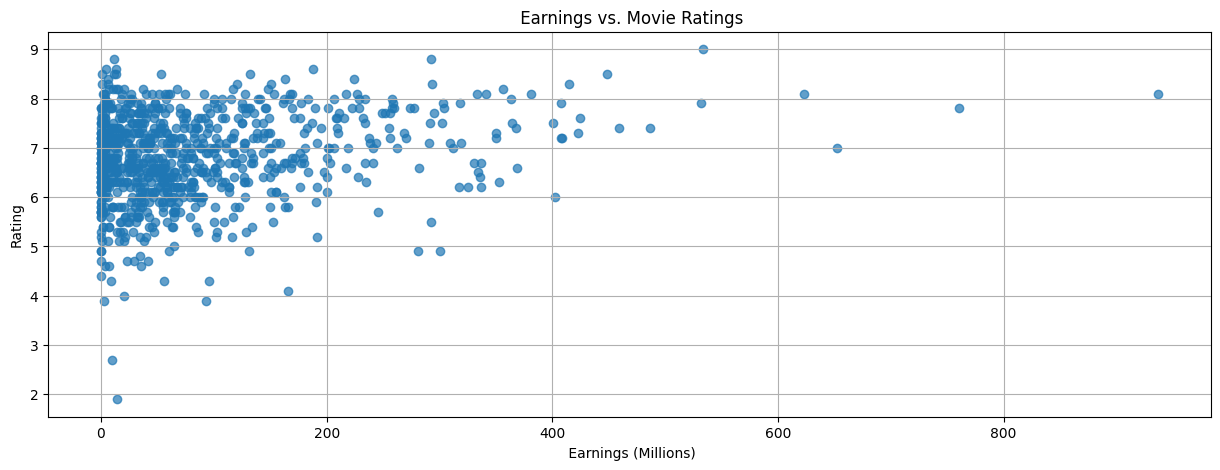

In [34]:
#14 Relationship between box office earnings and movie ratings:-
plt.figure(figsize=(15, 5))
plt.scatter(data['Revenue (Millions)'], data['Rating'], alpha=0.7)
plt.title(' Earnings vs. Movie Ratings')
plt.xlabel(' Earnings (Millions)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()



In [35]:
# correlation coefficient:-
correlation = data['Revenue (Millions)'].corr(data['Rating'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.21765389419105996


(array([612., 152.,  57.,  33.,  11.,   3.,   2.,   0.,   1.,   1.]),
 array([  0.   ,  93.663, 187.326, 280.989, 374.652, 468.315, 561.978,
        655.641, 749.304, 842.967, 936.63 ]),
 <BarContainer object of 10 artists>)

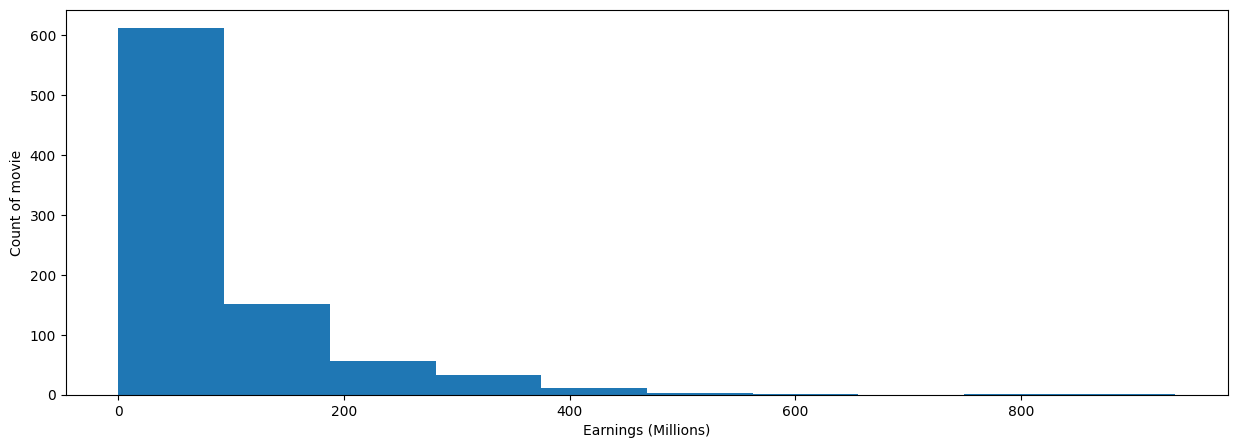

In [36]:
#16. Histogram of budgets for their distribution:-
plt.figure(figsize=(15, 5))
plt.xlabel('Earnings (Millions)')
plt.ylabel('Count of movie')
plt.hist(data['Revenue (Millions)'])

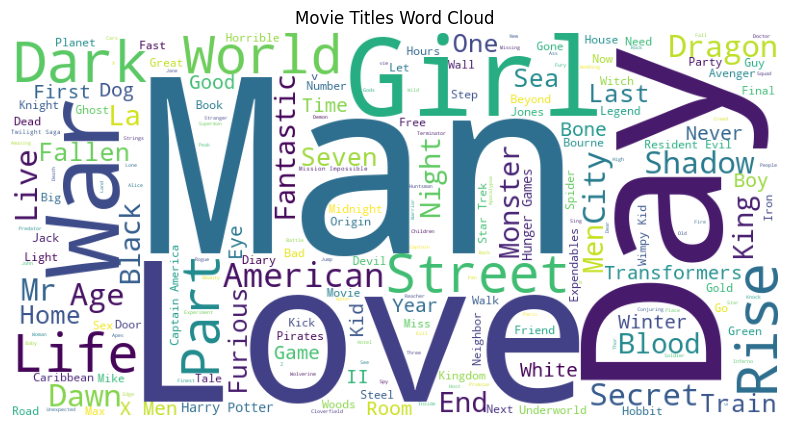

In [37]:
#19. Word cloud visualization using movie titles or keywords from descriptions.
# Combine movie titles into a string
all_titles = ' '.join(data['Title'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Plot
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Movie Titles Word Cloud')
plt.show()

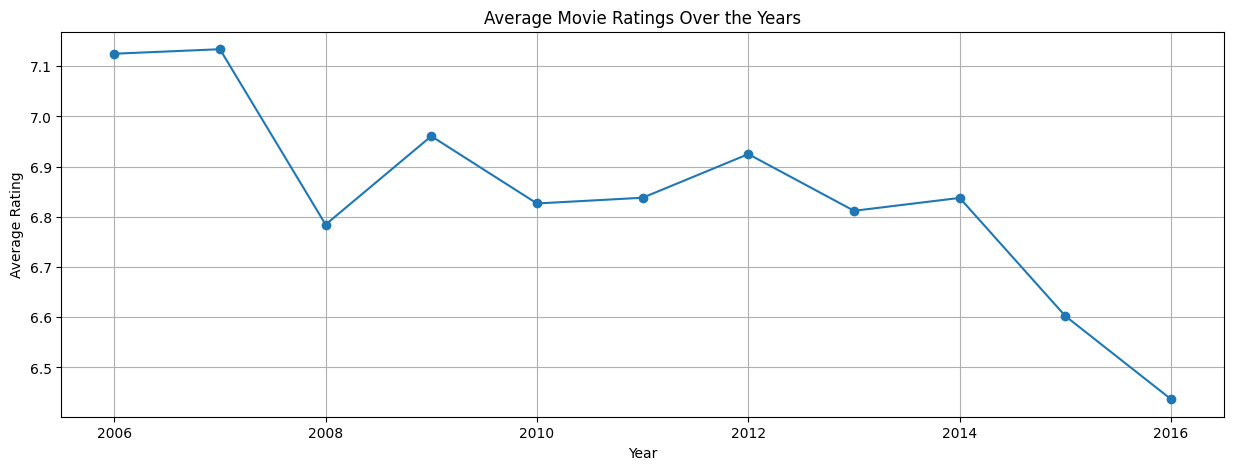

In [38]:
# 20Calculate average rating/year:-
avg_ratings = data.groupby('Year')['Rating'].mean()

# Line plot:-
plt.figure(figsize=(15, 5))
plt.plot(avg_ratings.index, avg_ratings.values, marker='o')
plt.title('Average Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [39]:
#22. Most common director-actor pairs:-
data['Actors'] = data['Actors'].str.split(', ')
data = data.explode('Actors')

# Count occurrences of each pair:-
director_actor_counts = data.groupby(['Director', 'Actors']).size().reset_index(name='Count')

# Most common director-actor pairs:-
most_common_pairs = director_actor_counts.sort_values(by='Count', ascending=False).head(5)
print("Most Common Director-Actor Pairs:")
print(most_common_pairs)

Most Common Director-Actor Pairs:
                Director                Actors  Count
1958      Lars von Trier  Charlotte Gainsbourg      4
2588  Paul W.S. Anderson        Milla Jovovich      4
850         Dennis Dugan          Adam Sandler      4
2791        Ridley Scott         Russell Crowe      4
825          David Yates          Rupert Grint      4


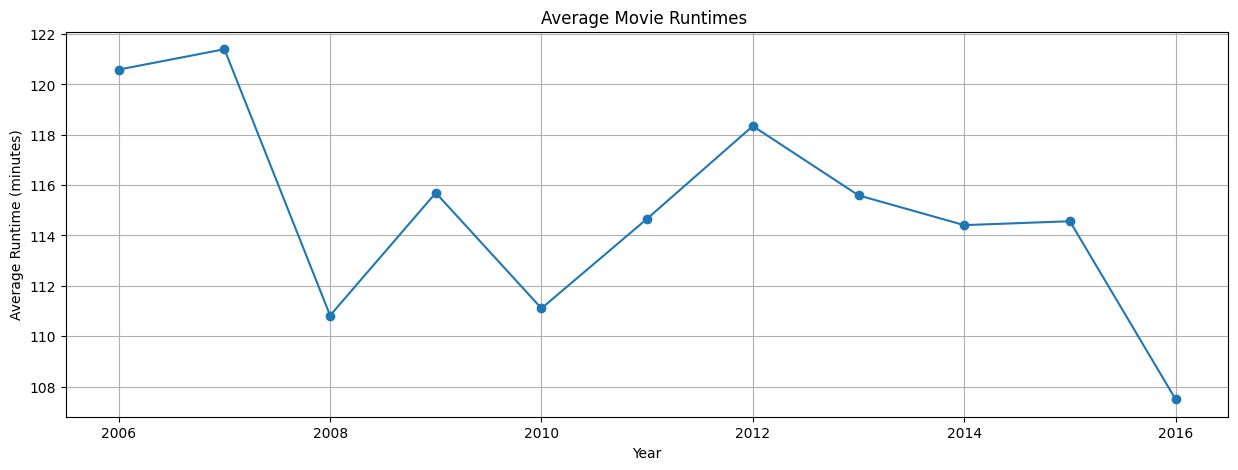

Overall Trend: Movies are decreasing in runtime


In [40]:
#23. Analysis about how movie runtimes have been changed over the years:-
average_runtime_per_year = data.groupby('Year')['Runtime (Minutes)'].mean()

# Line plot
plt.figure(figsize=(15, 5))
plt.plot(average_runtime_per_year.index, average_runtime_per_year.values, marker='o')
plt.title('Average Movie Runtimes ')
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.grid(True)
plt.show()
overall_trend = 'increasing' if average_runtime_per_year.diff().mean() > 0 else 'decreasing'
print(f"Overall Trend: Movies are {overall_trend} in runtime")

<Figure size 1500x500 with 0 Axes>

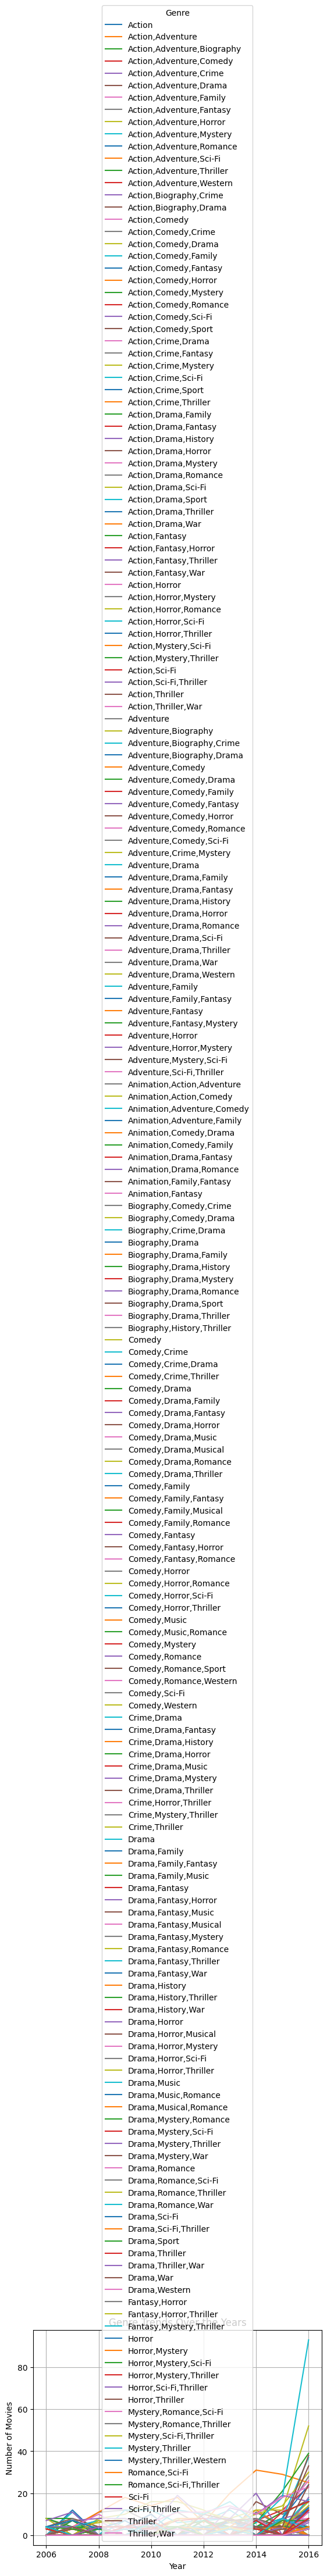

In [ ]:
genre_counts_per_year = data.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Plot the trends of different genres over the years
plt.figure(figsize=(15, 10))
genre_counts_per_year.plot()
plt.title('Genre Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
#plt.legend(title='Genre')
plt.grid(True)
plt.show()

In [42]:
corr=data['Rating'].corr(data['Runtime (Minutes)'])
corr

0.3830629570040134

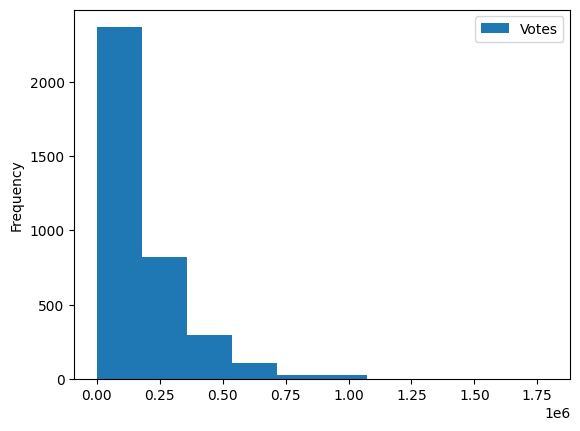

In [43]:
data.plot(kind='hist',x='Rating',y='Votes')
plt.show()

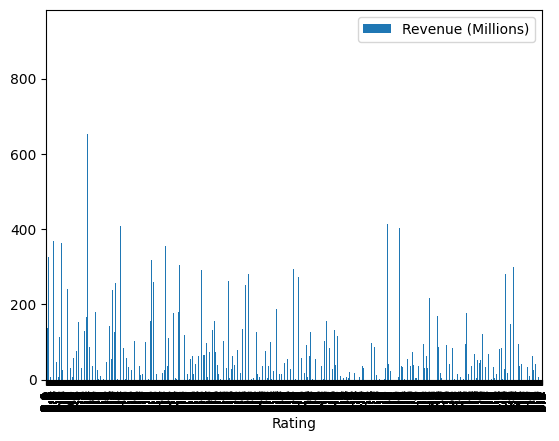

In [44]:
data.plot(kind='bar',x='Rating',y='Revenue (Millions)')
plt.show()

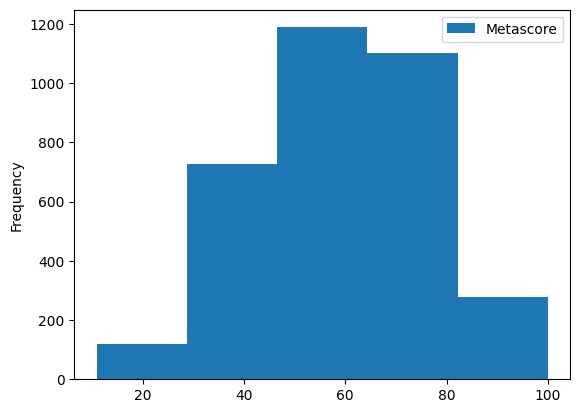

In [45]:
data.plot(kind='hist',bins=5,x='Revenue (Millions)',y='Metascore')
plt.show()

Text(0, 0.5, 'Rating')

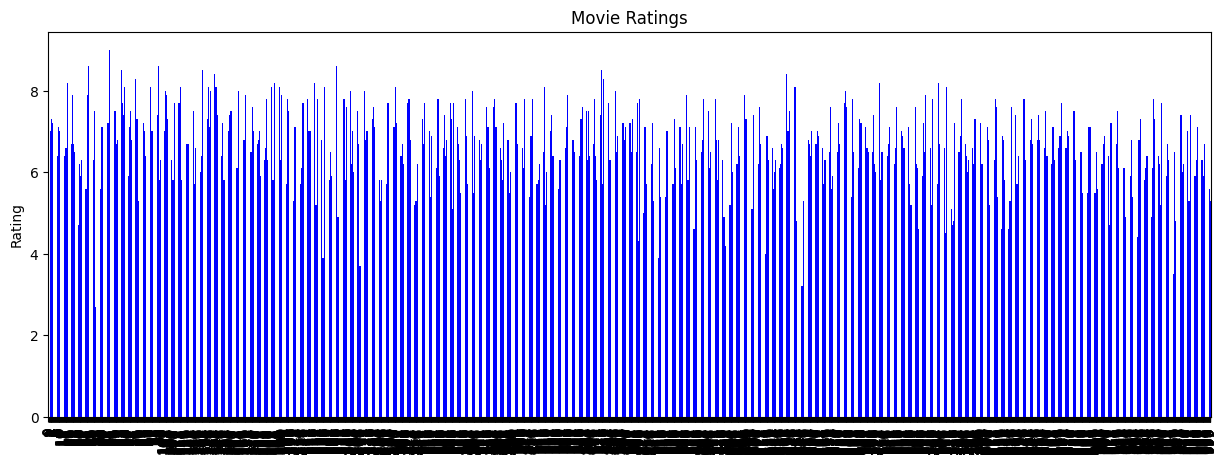

In [46]:
# 26 Set the movie titles as the index for better visualization
plt.figure(figsize=(15, 5))

# Bar plot for ratings
data['Rating'].plot(kind='bar', color='blue')
plt.title('Movie Ratings')
plt.ylabel('Rating')


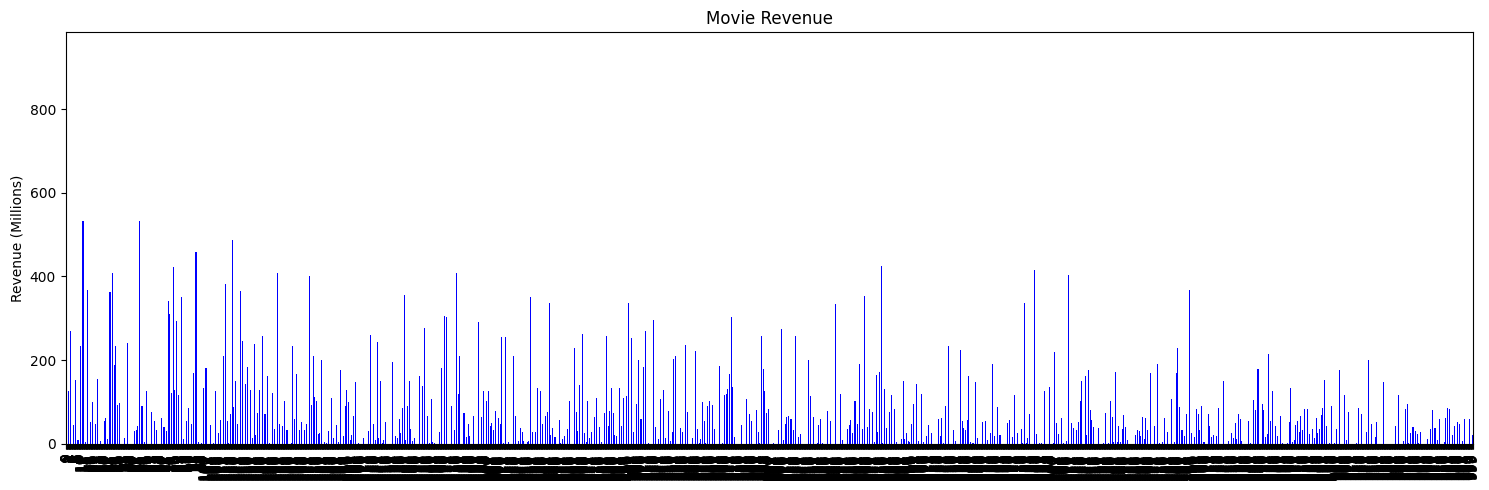

In [47]:
# Bar plot for revenue
plt.figure(figsize=(15, 5))
data['Revenue (Millions)'].plot(kind='bar', color='blue')
plt.title('Movie Revenue')
plt.ylabel('Revenue (Millions)')
plt.tight_layout()
plt.show()

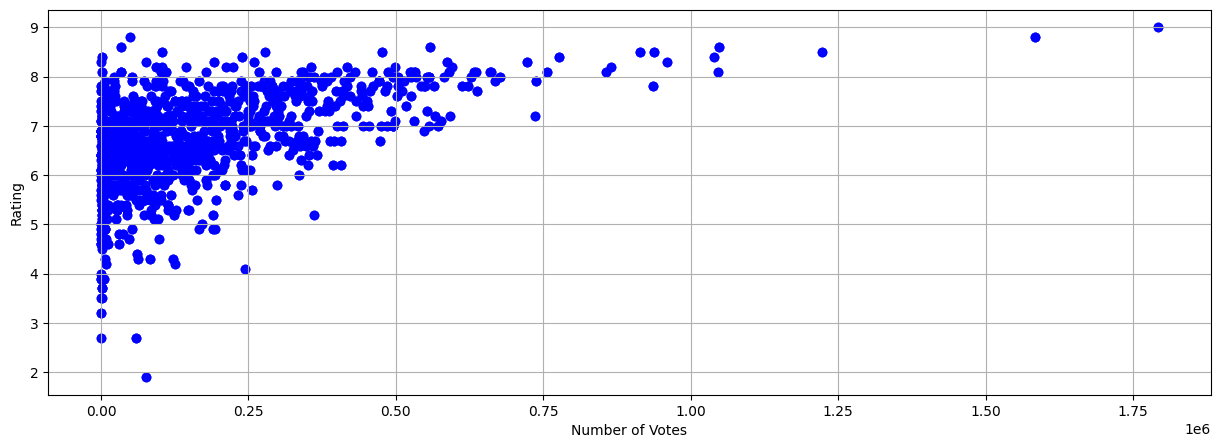

In [48]:
#28 Analyze the relationship between the number of votes and movie ratings
plt.figure(figsize=(15, 5))
plt.scatter(data['Votes'], data['Rating'], color='blue', alpha=0.7)
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


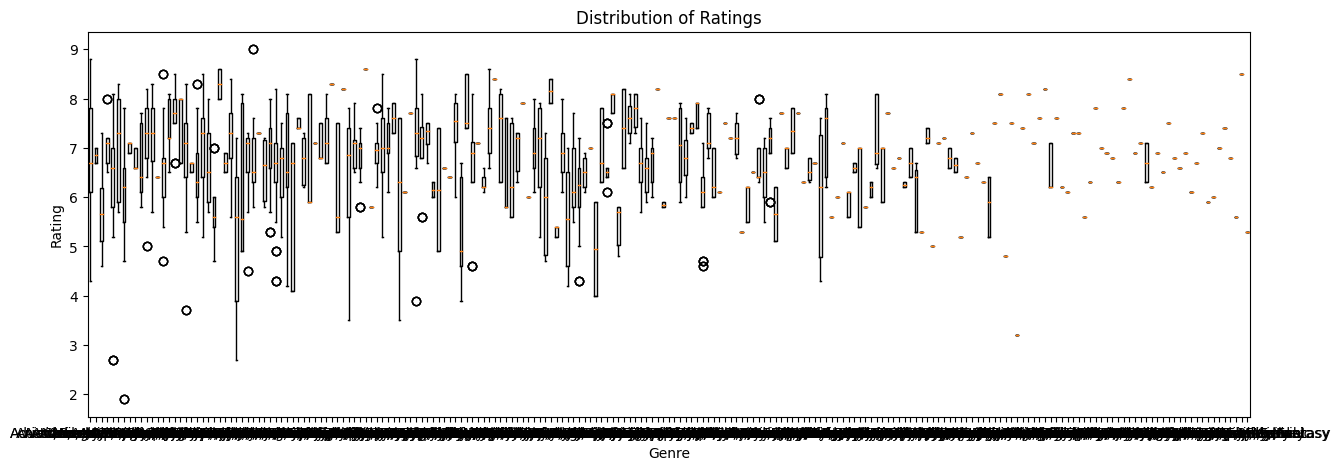

In [49]:
# 29,Explore the distribution of ratings for different genres. Are there variations?
# Get unique genres
unique_genres = data['Genre'].unique()
# Create box plots to explore rating distribution for different genres
plt.figure(figsize=(15, 5))
plt.boxplot([data[data['Genre'] == genre]['Rating'] for genre in unique_genres], labels=unique_genres)
plt.title('Distribution of Ratings')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

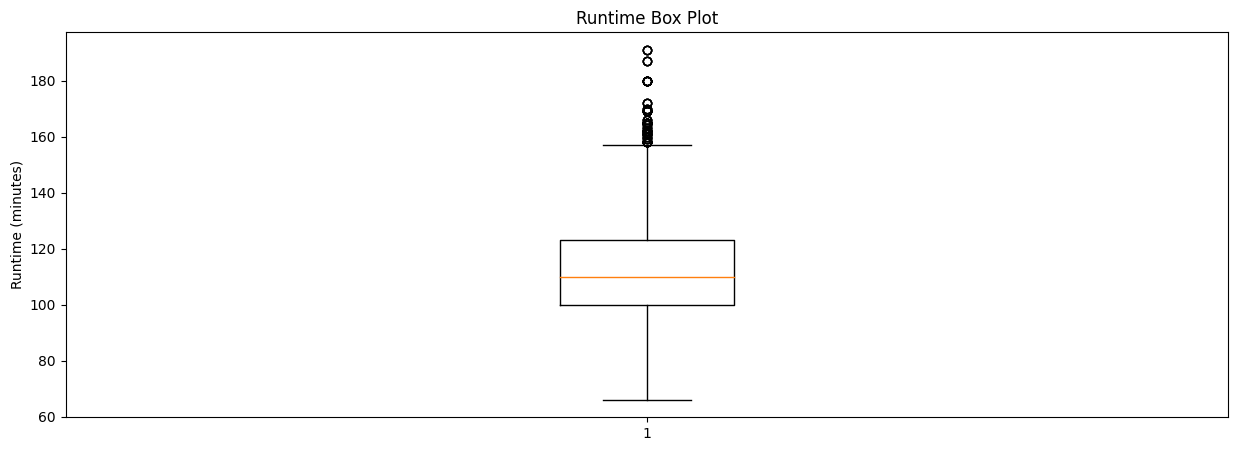

Identified Outliers:
     Rank                    Title                   Genre  \
82     83  The Wolf of Wall Street  Biography,Comedy,Crime   
82     83  The Wolf of Wall Street  Biography,Comedy,Crime   
82     83  The Wolf of Wall Street  Biography,Comedy,Crime   
88     89        The Hateful Eight     Crime,Drama,Mystery   
88     89        The Hateful Eight     Crime,Drama,Mystery   
88     89        The Hateful Eight     Crime,Drama,Mystery   
88     89        The Hateful Eight     Crime,Drama,Mystery   
267   268              Cloud Atlas            Drama,Sci-Fi   
267   268              Cloud Atlas            Drama,Sci-Fi   
267   268              Cloud Atlas            Drama,Sci-Fi   
267   268              Cloud Atlas            Drama,Sci-Fi   
311   312           La vie d'Adèle           Drama,Romance   
311   312           La vie d'Adèle           Drama,Romance   
311   312           La vie d'Adèle           Drama,Romance   
311   312           La vie d'Adèle           Dram

In [50]:
#30 find outliers
# Z-scores for movie runtime
z_scores = (data['Runtime (Minutes)'] - data['Runtime (Minutes)'].mean()) / data['Runtime (Minutes)'].std()
outliers = data[abs(z_scores) > 3]
# Box plot for runtime data
plt.figure(figsize=(15, 5))
plt.boxplot(data['Runtime (Minutes)'])
plt.title('Runtime Box Plot')
plt.ylabel('Runtime (minutes)')
plt.show()

# Print the identified outliers
print("Identified Outliers:")
print(outliers)

In [51]:
reg=linear_model.LinearRegression()
X = data[['Rating','Votes']]  # Features
y = data['Revenue (Millions)']     # Target variable
reg.fit([['Rating','Votes']],['Revenue (Millions)'])

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.